In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("/Users/raj/Code/starbucks/starbucks_drinkMenu_expanded.csv")
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75


In [4]:
#storing the dataset into another data frame
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Caffeine (mg)              241 non-null    object 

In [5]:
df1[' Total Fat (g)'].astype(str).astype(float)

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
237    3.2
238    0.1
239    3.5
240    1.5
241    0.1
Name:  Total Fat (g), Length: 242, dtype: float64

In [6]:
df1["Caffeine (mg)"].replace(np.nan,df["Caffeine (mg)"].mode()[0],inplace=True)
df1["Caffeine (mg)"].isnull().sum()

0

In [7]:
df1.groupby("Beverage_category")["Calories"].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [8]:
df1['Beverage_category']=  df1["Beverage_category"].replace(["Frappuccino® Blended Coffee","Frappuccino® Blended Crème","Smoothies","Signature Espresso Drinks"],"High_calorie_drinks")
df1['Beverage_category'] = df1['Beverage_category'].replace(["Frappuccino® Light Blended Coffee","Shaken Iced Beverages","Tazo® Tea Drinks","Classic Espresso Drinks"],"Medium_calorie_drinks")
df1['Beverage_category'] = df1['Beverage_category'].replace(["Coffee"],"Low_calorie_drinks")

<Axes: xlabel='Beverage_category', ylabel='count'>

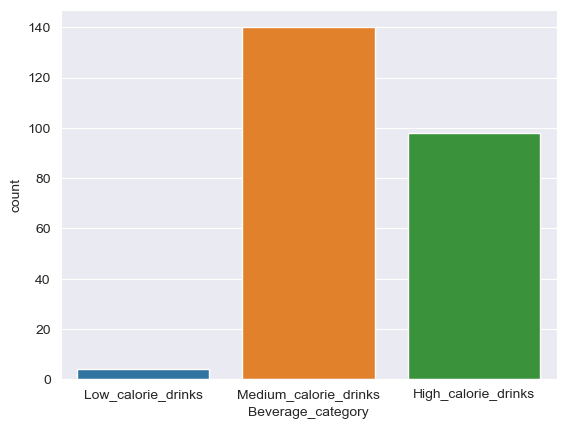

In [9]:
sns.countplot(x="Beverage_category",data=df1)

In [10]:
import scipy.stats as stats
df_hcal=df1[df1.Beverage_category=="High_calorie_drinks"]
calorie_values=df_hcal.Calories.tolist()
fat_of_hcal=np.array(df_hcal[' Total Fat (g)'])
df_mcal=df1[df1.Beverage_category=="Medium_calorie_drinks"]
fat_of_mcal=np.array(df_mcal[' Total Fat (g)'])
print(np.var(fat_of_hcal), np.var(fat_of_mcal))
#As you can see, the ratio is 10.104/6.902,
#which is less than 4:1. So we can say that the variances of the data groups are equal
print(stats.ttest_ind(fat_of_hcal,fat_of_mcal, equal_var=True))



10.104532486463974 6.902581122448979
Ttest_indResult(statistic=3.485276427350298, pvalue=0.0005860086110596558)


[]

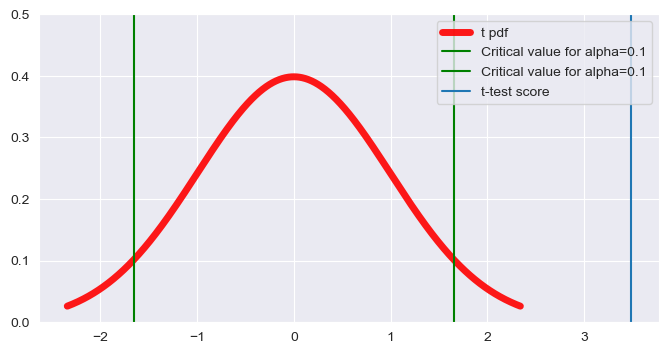

In [11]:
from scipy.stats import t
fig, ax =plt.subplots (figsize= (8, 4))
dof = 236
x = np.linspace(t.ppf(0.01,dof),t.ppf(0.99,dof),1000)
ax.plot(x, t.pdf(x, dof),'r-',lw=5, alpha=0.9, label ='t pdf')
plt.axvline(x=t.ppf(0.05, dof), label='Critical value for alpha=0.1', color='g')
plt.axvline(x=t.ppf(0.95, dof), label='Critical value for alpha=0.1', color='g')
plt.axvline (3.485276427350298, label='t-test score')
plt.legend ()
plt.ylim(0, 0.5)
plt.plot ( )

/var/folders/2l/q8wm67_x5yn9qtfylfw_gktc0000gn/T/ipykernel_71682/2378311868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hcal['Calories'],hist = False, kde = True, label='high calorie drink')


<Axes: xlabel='Calories', ylabel='Density'>

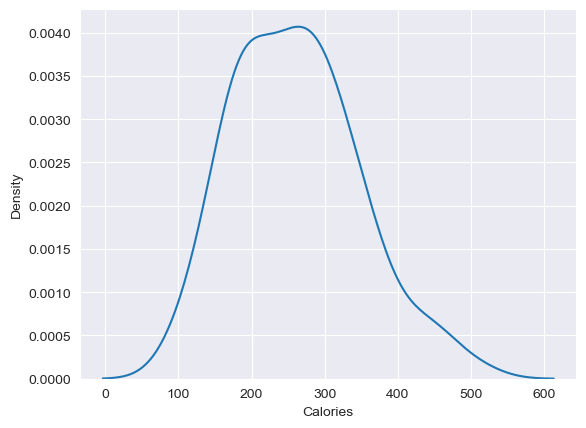

In [12]:
sns.distplot(df_hcal['Calories'],hist = False, kde = True, label='high calorie drink')



In [13]:
from scipy.stats import skew
from scipy.stats import skewtest
from scipy.stats import kurtosis
print(skew(calorie_values, axis=0, bias=True))
print(kurtosis(calorie_values, axis=0, bias=True))
print(skewtest(calorie_values))


0.4853731136611639
-0.08540694352090439
SkewtestResult(statistic=2.001702748147966, pvalue=0.045316710670966605)


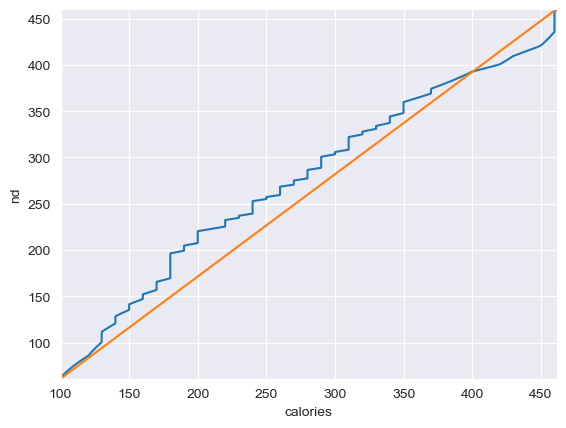

In [14]:
import statsmodels.api as sm
import pylab as py
import statistics
from scipy.stats import norm
t=np.linspace(0.01,0.99,1000)
q1=np.quantile(calorie_values,t)
q2=norm.ppf(t,loc=np.mean(calorie_values),scale=np.std(calorie_values))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("calories")
plt.ylabel("nd")
plt.show()




In [15]:
from scipy.stats import shapiro
#Shapiro-Wilk test is a test of normality, it determines whether the given sample comes from the normal distribution or not. Shapiro-Wilk’s test or Shapiro test is a normality test in frequentist statistics.
shapiro(calorie_values)

ShapiroResult(statistic=0.9765204191207886, pvalue=0.07643122971057892)

In [16]:
import scipy.stats as stats
from statistics import mean 
print(mean(calorie_values))
stats.ttest_1samp(calorie_values,280)

260.61224489795916


TtestResult(statistic=-2.2243787303164586, pvalue=0.02844166832306856, df=97)

Accept the null hypothesis

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Caffeine (mg)              242 non-null    object 

In [18]:
df1.groupby("Beverage_prep")[" Total Fat (g)"].mean()

Beverage_prep
2% Milk               5.520000
Doppio                0.000000
Grande                0.028571
Grande Nonfat Milk    1.134615
Short                 0.025000
Short Nonfat Milk     0.658333
Solo                  0.000000
Soymilk               4.063636
Tall                  0.014286
Tall Nonfat Milk      0.813043
Venti                 0.028571
Venti Nonfat Milk     1.322727
Whole Milk            4.562500
Name:  Total Fat (g), dtype: float64

In [19]:
df1['Beverage_prep']=  df1["Beverage_prep"].replace(["2% Milk","Whole Milk","Soymilk"],"High_fat_drinks")
df1['Beverage_prep'] = df1['Beverage_prep'].replace(["Short Nonfat Milk","Tall Nonfat Milk","Venti Nonfat Milk","Grande Nonfat Milk"],"medium_fat_drinks")
df1['Beverage_prep'] = df1['Beverage_prep'].replace(["Doppio","Grande","Short","Tall","Venti","Solo"],"Low_fat_drinks")
df1

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
0,Low_calorie_drinks,Brewed Coffee,Low_fat_drinks,3,0.1,0.0,0.0,0,5,0,0,0,0.3,175
1,Low_calorie_drinks,Brewed Coffee,Low_fat_drinks,4,0.1,0.0,0.0,0,10,0,0,0,0.5,260
2,Low_calorie_drinks,Brewed Coffee,Low_fat_drinks,5,0.1,0.0,0.0,0,10,0,0,0,1.0,330
3,Low_calorie_drinks,Brewed Coffee,Low_fat_drinks,5,0.1,0.0,0.0,0,10,0,0,0,1.0,410
4,Medium_calorie_drinks,Caffè Latte,medium_fat_drinks,70,0.1,0.1,0.0,5,75,10,0,9,6.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,High_calorie_drinks,Strawberries & Crème (Without Whipped Cream),High_fat_drinks,320,3.2,0.4,0.0,0,250,67,1,64,5.0,0
238,High_calorie_drinks,Vanilla Bean (Without Whipped Cream),medium_fat_drinks,170,0.1,0.1,0.0,0,160,39,0,38,4.0,0
239,High_calorie_drinks,Vanilla Bean (Without Whipped Cream),High_fat_drinks,200,3.5,2.0,0.1,10,160,39,0,38,3.0,0
240,High_calorie_drinks,Vanilla Bean (Without Whipped Cream),High_fat_drinks,180,1.5,0.2,0.0,0,160,37,1,35,3.0,0


<Axes: xlabel='Beverage_prep', ylabel='count'>

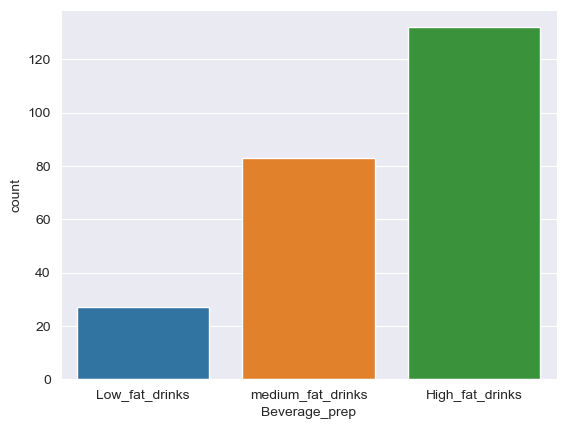

In [20]:
sns.countplot(x="Beverage_prep",data=df1)

In [21]:
df1["Beverage_prep"].unique()

array(['Low_fat_drinks', 'medium_fat_drinks', 'High_fat_drinks'],
      dtype=object)

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Calories~ C(Beverage_prep) + C(Beverage_category) + C(Beverage_prep):C(Beverage_category)', data=df1).fit()
sm.stats.anova_lm(model, typ=2)

/Users/raj/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/raj/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/raj/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Beverage_prep),7.450620e+05,2.0,5.875817e+01,4.677499e-13
C(Beverage_category),9.759371e-09,2.0,7.696578e-13,9.999993e-01
C(Beverage_prep):C(Beverage_category),1.612554e+05,4.0,6.358581e+00,3.672400e-04
Residual,1.489917e+06,235.0,NaN,NaN


In [23]:
from scipy.stats import chi2_contingency 
from scipy.stats import chi2
chisqt = pd.crosstab(df1.Beverage_prep, df1.Beverage_category, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])


(26.342875469024605, 8.083973701792049e-06, 3)


/var/folders/2l/q8wm67_x5yn9qtfylfw_gktc0000gn/T/ipykernel_71682/1611269357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df1.corr(), cmap="Blues", annot=True)


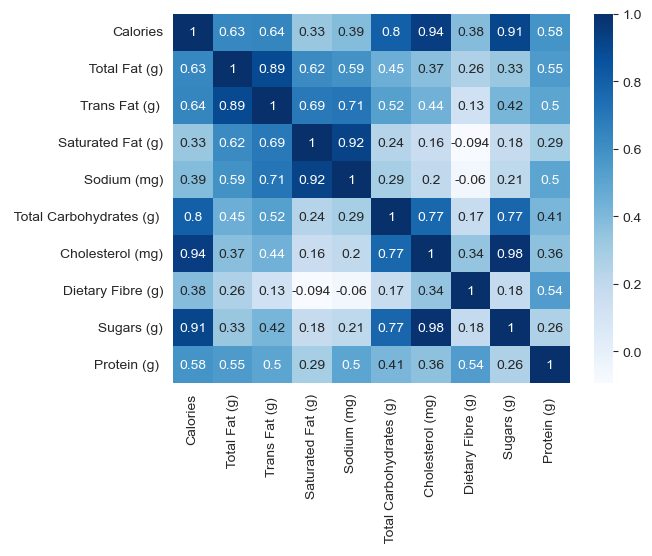

In [24]:
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="Blues", annot=True)
  

# displaying heatmap
plt.show()

In [25]:
df1["Beverage"].unique()

array(['Brewed Coffee', 'Caffè Latte',
       'Caffè Mocha (Without Whipped Cream)',
       'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Americano',
       'Cappuccino', 'Espresso', 'Skinny Latte (Any Flavour)',
       'Caramel Macchiato',
       'White Chocolate Mocha (Without Whipped Cream)',
       'Hot Chocolate (Without Whipped Cream)',
       'Caramel Apple Spice (Without Whipped Cream)', 'Tazo® Tea',
       'Tazo® Chai Tea Latte', 'Tazo® Green Tea Latte',
       'Tazo® Full-Leaf Tea Latte',
       'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)',
       'Iced Brewed Coffee (With Classic Syrup)',
       'Iced Brewed Coffee (With Milk & Classic Syrup)',
       'Shaken Iced Tazo® Tea (With Classic Syrup)',
       'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)',
       'Banana Chocolate Smoothie', 'Orange Mango Banana Smoothie',
       'Strawberry Banana Smoothie', 'Coffee',
       'Mocha (Without Whipped Cream)', 'Caramel (Without Whipped Cream)',
       'Java Chip (Wi